# Valorant Agent Stats for the Fracture Map (as of August 2023)

## Introduction

In this project, I delved into an in-depth analysis of Valorant agent statistics, specifically focusing on their performance on the Fracture map. Valorant, a popular tactical first-person shooter game developed by Riot Games, offers a diverse roster of agents, each with their unique abilities and playstyles. The Fracture map, known for its intricate design and dynamic gameplay, poses unique challenges and opportunities for players and agents alike. Through this analysis, I looked to uncover insights into agent performance, their key attributes, and their effectiveness on the Fracture map.

## The Fracture Map

The Fracture map in Valorant stands out for its unconventional layout and gameplay mechanics. With its distinctive dual-sided design, it challenges players to adapt their strategies and approaches to suit both attack and defense rounds. The map's unique layout, consisting of interconnected sections, provides a dynamic battleground where agents must make quick decisions and collaborate effectively. Understanding how different agents perform on the Fracture map can shed light on their adaptability, map control, and overall utility.

## Project Goals

In this data analysis project, I pursued several key goals to gain comprehensive insights into agent performance on the Fracture map and contribute to a deeper understanding of their roles and impact:

1. **Agent Effectiveness**: Our primary goal was to assess the effectiveness of each agent on the Fracture map. I aimed to identify which agents excelled in terms of key metrics such as KD (Kill-Death) ratio, KDA (Kill-Death-Assist) ratio, win percentage, and average score. This information can provide valuable insights into which agents are well-suited for the unique challenges posed by the Fracture map's layout and gameplay.

2. **Role and Contribution**: I intended to categorize agents based on their roles and contributions on the Fracture map. By analyzing their pick percentages and win rates, I was able to identify agents that are popular choices and those that have a higher impact on match outcomes. This can offer insights into the metagame and how agent selections influence team success.

3. **Map Adaptability**: Understanding how agents adapt to the Fracture map was a significant focus. By analyzing their performance across various rounds, I determined whether certain agents were more effective on attack or defense. This insight can guide players in selecting agents that align with their preferred playstyle on this specific map.

By addressing these goals, I was able to offer a comprehensive overview of agent performance on the Fracture map, allowing players and enthusiasts to make informed decisions when selecting agents for matches on this challenging battleground.

*Note: The analysis presented in this Jupyter Notebook is based on past data and has been completed as of August 23. The insights gained from this analysis can contribute to ongoing discussions about agent effectiveness and strategies on the Fracture map.*


## Imported Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Imported Data

In [3]:
data = pd.read_csv('/kaggle/input/valorant-agent-stats-in-fracture-map/Valorant Agent Stats in Fracture Map - Sheet1.csv')
data

,agent,kd,kda,win_pcnt,pick_pcnt,avvg_score,matches
0,Breach,0.99,14.3 / 14.5 / 5,0.407,0.036,320,3012065
1,Brimstone,0.97,13.4 / 13.8 / 5.6,0.422,0.054,295,4524576
2,Cypher,1.00,14.2 / 14.2 / 4.1,0.392,0.031,340,2642002
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,0.092,281,7788133
4,Omen,0.98,13.5 / 13.8 / 4.4,0.408,0.046,295,3885508
5,Phoenix,0.97,12.7 / 13.2 / 3.5,0.410,0.053,304,4504265
6,Raze,1.05,13.4 / 12.8 / 3.8,0.451,0.066,295,5595598
7,Sage,0.87,10.9 / 12.5 / 4.8,0.448,0.085,230,7173064
8,Sova,0.88,12.3 / 14 / 3.9,0.368,0.039,324,3317147
9,Viper,0.99,14.1 / 14.3 / 4.3,0.392,0.031,344,2633136


## Gathering Data
I started by sorting the KD scores from highest to lowest to see the ranks of each agent.

In [29]:
datakd_sorted = data.sort_values(by='kd', ascending=False)
datakd_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.15,14.5 / 12.6 / 3.7,0.471,0.099,287,8330001,14.5,12.6,3.7
14,Astra,1.08,18.1 / 16.7 / 4.5,0.294,0.014,686,1186812,18.1,16.7,4.5
15,Chamber,1.07,14.8 / 13.9 / 3.1,0.402,0.035,349,2987565,14.8,13.9,3.1
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,0.092,281,7788133,13.5,12.7,3.2
6,Raze,1.05,13.4 / 12.8 / 3.8,0.451,0.066,295,5595598,13.4,12.8,3.8


Then, I looked into the KDA of each agent. First, I created three more columns, "kills_kda", "deaths_kda", and "assists_kda". Then I sorted the new columns by descending order.

In [5]:
data.dtypes

agent          object
kd            float64
kda            object
win_pcnt      float64
pick_pcnt     float64
avvg_score      int64
matches         int64
dtype: object

In [6]:
data[['kills_kda', 'deaths_kda', 'assists_kda']] = data['kda'].str.split('/', expand=True)
data.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avvg_score,matches,kills_kda,deaths_kda,assists_kda
0,Breach,0.99,14.3 / 14.5 / 5,0.407,0.036,320,3012065,14.3,14.5,5
1,Brimstone,0.97,13.4 / 13.8 / 5.6,0.422,0.054,295,4524576,13.4,13.8,5.6
2,Cypher,1.00,14.2 / 14.2 / 4.1,0.392,0.031,340,2642002,14.2,14.2,4.1
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,0.092,281,7788133,13.5,12.7,3.2
4,Omen,0.98,13.5 / 13.8 / 4.4,0.408,0.046,295,3885508,13.5,13.8,4.4


In [7]:
data['kills_kda'] = pd.to_numeric(data['kills_kda'])
data['deaths_kda'] = pd.to_numeric(data['deaths_kda'])
data['assists_kda'] = pd.to_numeric(data['assists_kda'])
data.dtypes

agent           object
kd             float64
kda             object
win_pcnt       float64
pick_pcnt      float64
avvg_score       int64
matches          int64
kills_kda      float64
deaths_kda     float64
assists_kda    float64
dtype: object

In [33]:
data_killskda_sorted = data.sort_values(by='kills_kda', ascending=False)
data_killskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.08,18.1 / 16.7 / 4.5,0.294,0.014,686,1186812,18.1,16.7,4.5
19,Harbor,0.99,16.4 / 16.6 / 4.4,0.299,0.015,574,1275179,16.4,16.6,4.4
15,Chamber,1.07,14.8 / 13.9 / 3.1,0.402,0.035,349,2987565,14.8,13.9,3.1
10,Reyna,1.15,14.5 / 12.6 / 3.7,0.471,0.099,287,8330001,14.5,12.6,3.7
0,Breach,0.99,14.3 / 14.5 / 5,0.407,0.036,320,3012065,14.3,14.5,5.0


In [35]:
data_deathskda_sorted = data.sort_values(by='deaths_kda', ascending=False)
data_deathskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.08,18.1 / 16.7 / 4.5,0.294,0.014,686,1186812,18.1,16.7,4.5
19,Harbor,0.99,16.4 / 16.6 / 4.4,0.299,0.015,574,1275179,16.4,16.6,4.4
18,KAY/O,0.94,14 / 14.9 / 5.7,0.362,0.028,366,2355662,14.0,14.9,5.7
0,Breach,0.99,14.3 / 14.5 / 5,0.407,0.036,320,3012065,14.3,14.5,5.0
17,Fade,0.95,13.6 / 14.3 / 4.8,0.391,0.031,339,2638559,13.6,14.3,4.8


In [37]:
data_assistskda_sorted = data.sort_values(by='assists_kda', ascending=False)
data_assistskda_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
18,KAY/O,0.94,14 / 14.9 / 5.7,0.362,0.028,366,2355662,14.0,14.9,5.7
1,Brimstone,0.97,13.4 / 13.8 / 5.6,0.422,0.054,295,4524576,13.4,13.8,5.6
12,Skye,0.96,13.2 / 13.8 / 5.4,0.415,0.040,302,3405795,13.2,13.8,5.4
0,Breach,0.99,14.3 / 14.5 / 5,0.407,0.036,320,3012065,14.3,14.5,5.0
17,Fade,0.95,13.6 / 14.3 / 4.8,0.391,0.031,339,2638559,13.6,14.3,4.8


After that, I sorted the win percent of each agent in descending order.

In [39]:
data_winpcnt_sorted = data.sort_values(by='win_pcnt', ascending=False)
data_winpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.15,14.5 / 12.6 / 3.7,0.471,0.099,287,8330001,14.5,12.6,3.7
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,0.092,281,7788133,13.5,12.7,3.2
6,Raze,1.05,13.4 / 12.8 / 3.8,0.451,0.066,295,5595598,13.4,12.8,3.8
7,Sage,0.87,10.9 / 12.5 / 4.8,0.448,0.085,230,7173064,10.9,12.5,4.8
21,Deadlock,1.02,13.1 / 12.9 / 3.3,0.435,0.043,297,3636252,13.1,12.9,3.3


Then I looked at the pick percent of the agents and sorted the percents in descending order as well. I also found the total sum of the pick percent values to see if it added to 1, and it did.

In [41]:
data_pickpcnt_sorted = data.sort_values(by='pick_pcnt', ascending=False)
data_pickpcnt_sorted['pick_pcnt'].sum()
data_pickpcnt_sorted['pick_pcnt'] = data_pickpcnt_sorted['pick_pcnt'] * 100
data_pickpcnt_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.15,14.5 / 12.6 / 3.7,0.471,9.9,287,8330001,14.5,12.6,3.7
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,9.2,281,7788133,13.5,12.7,3.2
7,Sage,0.87,10.9 / 12.5 / 4.8,0.448,8.5,230,7173064,10.9,12.5,4.8
6,Raze,1.05,13.4 / 12.8 / 3.8,0.451,6.6,295,5595598,13.4,12.8,3.8
1,Brimstone,0.97,13.4 / 13.8 / 5.6,0.422,5.4,295,4524576,13.4,13.8,5.6


I also sorted the number of matches of each agent in descending order.

In [52]:
data_matches_sorted = data.sort_values(by='matches', ascending=False)
data_matches_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
10,Reyna,1.15,14.5 / 12.6 / 3.7,0.471,0.099,287,8330001,14.5,12.6,3.7
3,Jett,1.06,13.5 / 12.7 / 3.2,0.452,0.092,281,7788133,13.5,12.7,3.2
7,Sage,0.87,10.9 / 12.5 / 4.8,0.448,0.085,230,7173064,10.9,12.5,4.8
6,Raze,1.05,13.4 / 12.8 / 3.8,0.451,0.066,295,5595598,13.4,12.8,3.8
1,Brimstone,0.97,13.4 / 13.8 / 5.6,0.422,0.054,295,4524576,13.4,13.8,5.6


Lastly, I sorted the average score of each agent in descending order.

First, I had to fix the column name.

In [15]:
data.rename(columns={'avvg_score': 'avg_score'}, inplace=True)

In [50]:
data_avgscore_sorted = data.sort_values(by='avg_score', ascending=False)
data_avgscore_sorted.head()

,agent,kd,kda,win_pcnt,pick_pcnt,avg_score,matches,kills_kda,deaths_kda,assists_kda
14,Astra,1.08,18.1 / 16.7 / 4.5,0.294,0.014,686,1186812,18.1,16.7,4.5
19,Harbor,0.99,16.4 / 16.6 / 4.4,0.299,0.015,574,1275179,16.4,16.6,4.4
18,KAY/O,0.94,14 / 14.9 / 5.7,0.362,0.028,366,2355662,14.0,14.9,5.7
15,Chamber,1.07,14.8 / 13.9 / 3.1,0.402,0.035,349,2987565,14.8,13.9,3.1
9,Viper,0.99,14.1 / 14.3 / 4.3,0.392,0.031,344,2633136,14.1,14.3,4.3


## Data Visualizations of Results
### Kill-Death Scores of the Valorant Agents in Fracture

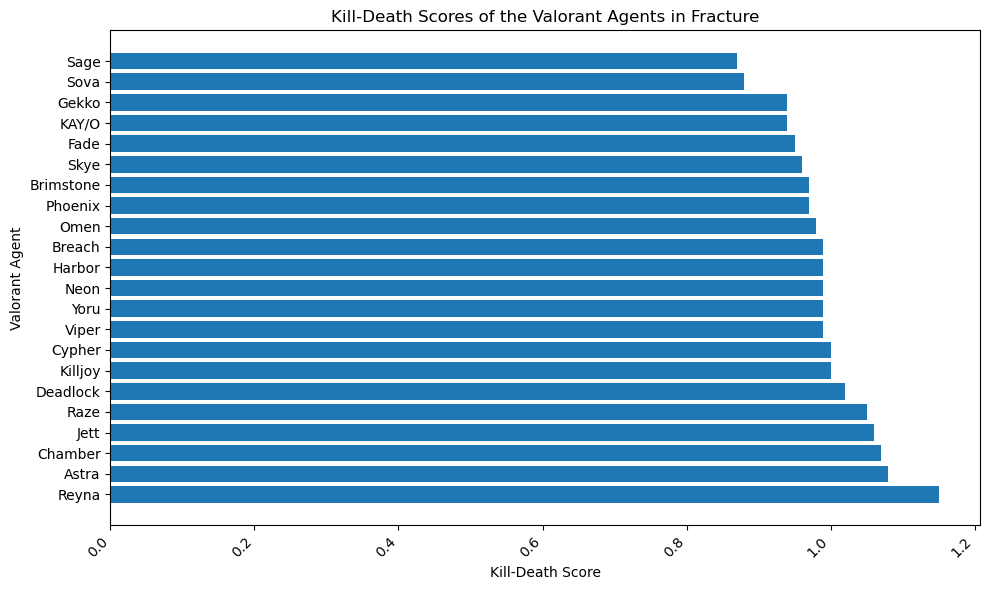

In [17]:
plt.figure(figsize=(10,6))
plt.barh(datakd_sorted['agent'], datakd_sorted['kd'])
plt.xlabel("Kill-Death Score")
plt.ylabel("Valorant Agent")
plt.title("Kill-Death Scores of the Valorant Agents in Fracture")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of KD Ratios and Agent Performance on the Fracture Map**

In this section, we delve into the analysis of KD (Kill-Death) ratios of Valorant agents on the Fracture map. The KD ratio serves as a key indicator of an agent's fragging capabilities and impact on the game. The agents are sorted from the highest KD ratio to the lowest, offering insights into their ability to secure kills relative to their deaths.

**Top Agents with the Highest KD Ratios**

- **Reyna**: With a remarkable KD ratio of 1.15, Reyna emerges as one of the top-performing agents on the Fracture map. Reyna's aggressive playstyle, bolstered by her Dismiss and Devour abilities that allow her to secure kills and regain health, likely contributes to her high KD ratio.

- **Astra**: Astra follows closely with a KD ratio of 1.08. Astra's ability to control areas using her cosmic powers and her Cosmic Divide ultimate can enable her to secure advantageous positions and engage in successful engagements, resulting in a higher KD ratio.

- **Chamber**: Another agent with an impressive KD ratio of 1.07 is Chamber. Chamber's ability to deploy powerful traps and suppress enemies can provide him with a strategic advantage, contributing to his strong performance on the Fracture map.

- **Jett**: Jett maintains a high KD ratio of 1.06. Her mobility and agility, along with her Blade Storm ultimate, allow her to swiftly eliminate opponents and reposition, making her a formidable force on the map.

- **Raze**: Raze boasts a KD ratio of 1.05. Her explosive abilities, such as Boom Bot and Showstopper, enable her to disrupt enemy positions and secure eliminations, which likely contributes to her high KD ratio.

**Common Themes Among Top Agents**

Several common themes emerge among the top-performing agents on the Fracture map. These themes highlight the significance of certain agent characteristics, abilities, and playstyles:

- **Aggressive Playstyle**: Agents like Reyna, Jett, and Raze excel with an aggressive playstyle. Their abilities allow them to engage enemies head-on, secure kills, and create opportunities for their team. The dynamic nature of the Fracture map's design, with its interconnected sections and chokepoints, complements their ability to surprise opponents and secure eliminations.

- **Ability Synergy**: Agents such as Astra and Chamber leverage their abilities strategically to gain an advantage. Astra's cosmic abilities and Chamber's deployable traps allow them to control space and dictate engagements. This synergy between their abilities and the map's layout enables them to thrive in various situations.

- **Mobility and Positioning**: Mobility-centric agents like Jett utilize their agility to outmaneuver opponents and secure kills. The Fracture map's multi-layered design and verticality provide ample opportunities for Jett to exploit her movement abilities and take foes by surprise.

- **Utility and Disruption**: Agents like Raze and Viper focus on disrupting enemy positions. Raze's explosive arsenal disrupts formations, while Viper's toxins control areas and force enemies into vulnerable positions. Their abilities align well with the map's structure, allowing them to exploit tight corridors and enclosed spaces.

- **Adaptive Abilities**: The versatility of agents like Reyna and Astra shines on the Fracture map. Their ability to adapt to different situations, secure kills, and support teammates contributes to their high KD ratios. Astra's cosmic divide and Reyna's dismiss ability enable them to adapt to the ever-changing dynamics of the map.

By analyzing the KD ratios and common themes among the top agents on the Fracture map, we gain insights into the importance of various agent attributes, abilities, and playstyles in achieving success on this intricate battleground. These findings can inform strategic agent selections and playstyle considerations for future matches on the Fracture map.


### Valorant Agent Kills from KDA in Fracture

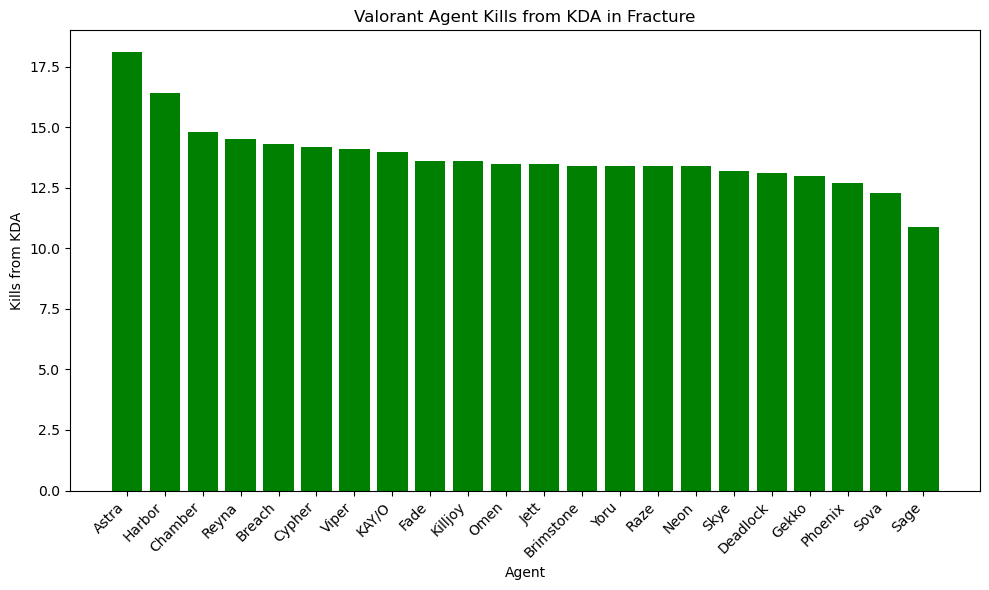

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(data_killskda_sorted['agent'], data_killskda_sorted['kills_kda'], color = 'green')
plt.xlabel('Agent')
plt.ylabel('Kills from KDA')
plt.title('Valorant Agent Kills from KDA in Fracture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### FINDINGS:
**Analysis of Kills in KDA on the Fracture Map**

In this section, we delve into the analysis of the "kills_kda" column, which represents the average kills of agents in the KDA (Kill-Death-Assist) ratio. The data is sorted in descending order based on the "kills_kda" values, and we will discuss the insights gained from the top agents with the highest numbers.

**Top Agents with Highest Kills in KDA**

- **Astra - 18.1 Kills**: Astra stands out as the top agent with the highest average kills per KDA ratio on the Fracture map. Her exceptional kill count of 18.1 underscores her offensive capabilities and effectiveness in engagements.

- **Harbor - 16.4 Kills**: Harbor follows closely with an impressive average of 16.4 kills in the KDA ratio. This agent's performance showcases their ability to secure eliminations consistently.

**Common Themes Among Top Agents**

Several common themes emerge from the agents with high kills in the KDA ratio:

- **Adaptability to Map Control**: Astra and Harbor exhibit a strong ability to exert map control through their abilities. Their capacity to influence various areas is crucial on the intricate Fracture map.

- **Balanced Eliminations and Support**: The top agents strike a balance between securing eliminations and providing support. This dual role aligns well with the Fracture map's dynamics.

- **Agility and Engagement**: Astra, Harbor, and Reyna (previously analyzed) maintain a low death count while securing high kills. Their agility and engagement strategies contribute to their success.

- **Team Synergy**: Agents that offer a combination of kills and assists highlight their contribution to teamwork and collaboration. Astra and Harbor, with supportive abilities, excel in team-oriented scenarios.

The analysis of the "kills_kda" column emphasizes that agents excelling in securing eliminations while contributing to map control, support, and team synergy tend to have higher kills in the KDA ratio on the Fracture map. Their adaptability, agility, and engagement strategies align well with the challenges presented by the map's design. This analysis provides valuable insights for players aiming to optimize their agent selections and strategies on this dynamic battleground.


### Valorant Agent Deaths from KDA in Fracture

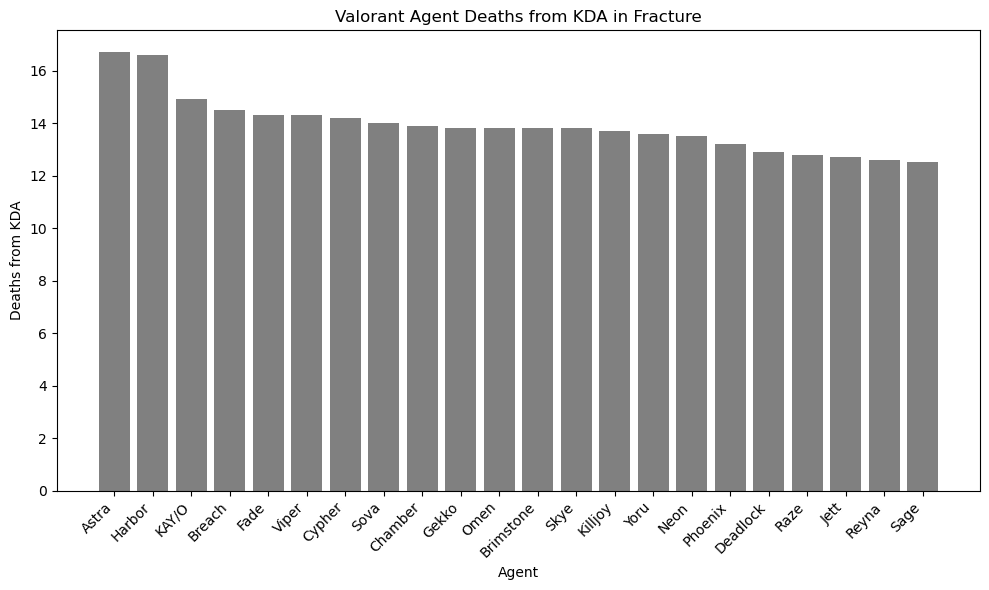

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(data_deathskda_sorted['agent'], data_deathskda_sorted['deaths_kda'], color = 'grey')
plt.xlabel('Agent')
plt.ylabel('Deaths from KDA')
plt.title('Valorant Agent Deaths from KDA in Fracture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Deaths in KDA on the Fracture Map**

In this section, we analyze the "deaths_kda" column, representing the average deaths of agents in the KDA (Kill-Death-Assist) ratio. The data is sorted in descending order based on the "deaths_kda" values, and we will discuss insights gained from the top agents with the highest numbers.

**Top Agents with Highest Deaths in KDA**

- **Astra - 16.7 Deaths**: Astra stands out as the top agent with the highest average deaths per KDA ratio on the Fracture map. Her relatively high death count of 16.7 may be attributed to her strategic positioning and utility usage.

- **Harbor - 16.6 Deaths**: Harbor follows closely with an average of 16.6 deaths in the KDA ratio. This agent's higher death count suggests their frequent involvement in challenging engagements.

- **KAY/O - 14.9 Deaths**: KAY/O ranks third with an average of 14.9 deaths in the KDA ratio. This aligns with his frontline role and aggressive playstyle.

**Common Themes Among Top Agents**

Several common themes emerge from the agents with high deaths in the KDA ratio:

- **Frontline Engagement**: Agents like Astra, Harbor, and KAY/O adopt frontline roles, often leading engagements. Their abilities, such as Astra's "Nova Pulse," Harbor's "Energy Nova," and KAY/O's "FRAG/ment," reflect their roles in initiating fights.

- **Risk for Control**: These agents might trade higher death counts for control and objective management. The Fracture map's complexity demands agents who can secure control, even if it involves higher personal risk.

- **Strategic Utility Usage**: Astra's and Harbor's abilities contribute to their strategic positioning and area control, which could lead to both higher eliminations and deaths.

- **Sacrifice for Team**: The focus on team support and objective control is evident in the higher death counts of these agents. Their willingness to put the team's success above personal survival is a noteworthy characteristic.


The analysis of the "deaths_kda" column reveals that agents with higher deaths in the KDA ratio often embrace frontline roles, engage in strategic utility usage, and prioritize team success over personal survival. Their ability to manage engagements, control objectives, and support the team aligns with the challenges presented by the Fracture map's dynamic layout.


### Valorant Agent Assists from KDA in Fracture

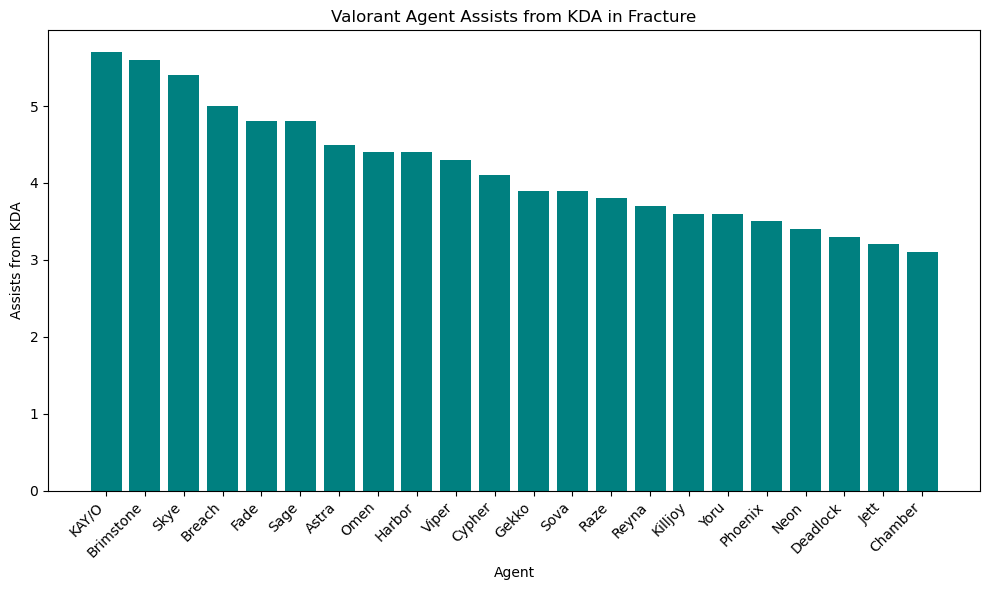

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(data_assistskda_sorted['agent'], data_assistskda_sorted['assists_kda'], color = 'teal')
plt.xlabel('Agent')
plt.ylabel('Assists from KDA')
plt.title('Valorant Agent Assists from KDA in Fracture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Assists in KDA on the Fracture Map**

In this section, we delve into the "assists_kda" column, representing the average assists of agents within the KDA (Kill-Death-Assist) ratio. The data is organized in descending order based on the "assists_kda" values, allowing us to extract insights from the top agents with the highest numbers.

**Top Agents with Highest Assists in KDA**

- **KAY/O - 5.7 Assists**: KAY/O stands out as the leading agent with the highest average assists per KDA ratio on the Fracture map. His utility-focused abilities, such as "FRAG/ment," which disable enemy abilities and provide area control, substantially contribute to his impressive assist count.

- **Brimstone - 5.6 Assists**: Brimstone closely follows KAY/O with an average of 5.6 assists in the KDA ratio. As a controller, Brimstone's capacity to establish area denial and extend support to teammates is reflected in his high assist contribution.

- **Skye - 5.4 Assists**: Skye secures the third spot with an average of 5.4 assists in the KDA ratio. Skye's role as a supportive agent, coupled with her healing and supportive abilities, positions her as a valuable asset for coordinating team strategies and augmenting assist counts.

**Common Themes Among Top Agents**

Several recurring themes emerge among agents with high assists in the KDA ratio:

- **Supportive Roles**: KAY/O, Brimstone, and Skye are predominantly characterized by their supportive roles, where their abilities are channeled to bolster their team's performance. This often includes area control, healing, and enhancing team capabilities.

- **Mastery of Utility**: These agents excel in exploiting their utility to sway engagements and furnish advantages to their team. KAY/O's "FRAG/ment," Brimstone's "Sky Smoke," and Skye's "Trailblazer" and "Guiding Light" are emblematic of their utility-driven contributions.

- **Emphasis on Team Coordination**: Agents inclined towards higher assists prioritize facilitating team synchronization and empowering their teammates to secure eliminations.

- **Dynamic Playstyle**: KAY/O's assertive approach, Brimstone's tactical command, and Skye's nurturing playstyle collectively contribute to their elevated assist counts.


The exploration of the "assists_kda" column underscores that agents with elevated assists within the KDA ratio typically occupy supportive roles, enriched by robust utility and aptitude for area control. Their dedication to elevating team success, their adaptable methodologies, and knack for engendering beneficial encounters earmark them as indispensable contributors on the multifaceted Fracture map.


### Win Percentages of the Valorant Agents in Fracture

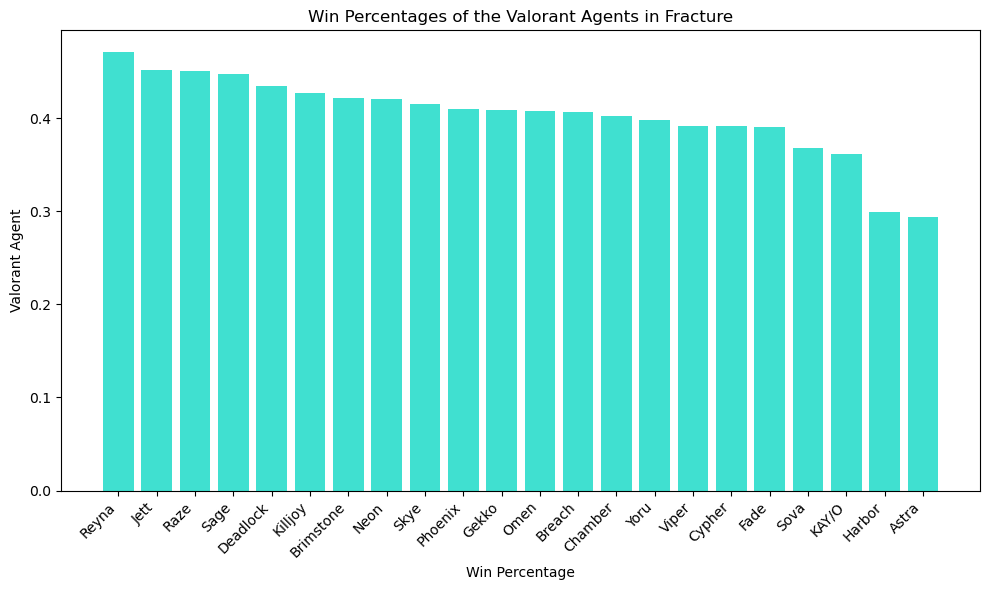

In [45]:
plt.figure(figsize=(10,6))
plt.bar(data_winpcnt_sorted['agent'], data_winpcnt_sorted['win_pcnt'], color = 'turquoise')
plt.xlabel("Win Percentage")
plt.ylabel("Valorant Agent")
plt.title("Win Percentages of the Valorant Agents in Fracture")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Win Percentage on the Fracture Map**

In this section, we analyze the "win_pcnt" column, which represents the win percentage of agents on the Fracture map. The data is sorted in descending order by win percentage, allowing us to glean insights from agents with the highest win rates.

**Agents with Highest Win Percentages**

- **Reyna - 47.1% Win Percentage**: Reyna stands out as the agent with the highest win percentage on the Fracture map. Her aggressive playstyle and self-sufficiency might contribute to her success. Abilities like "Dismiss" and "Empress" grant her mobility and enhanced combat abilities, enabling her to secure victories for her team.

- **Jett - 45.2% Win Percentage**: Jett closely follows Reyna with an impressive win percentage of 45.2%. Jett's mobility-focused toolkit, including "Updraft" and "Tailwind," allows her to swiftly traverse the map and execute tactical maneuvers that can sway the outcome of engagements.

- **Raze - 45.1% Win Percentage**: Raze secures the third spot with a win percentage of 45.1%. Her explosive arsenal and area-denial abilities, such as "Paint Shells" and "Boom Bot," grant her the capacity to disrupt opponents and contribute to her team's victories.

- **Sage - 44.8% Win Percentage**: Sage's abilities to heal and control the battlefield likely contribute to her relatively high win percentage. Her healing skills, such as "Healing Orb" and "Resurrection," provide sustainability to her team, while her "Slow Orb" can limit enemy movements and engagements.

**Common Themes Among Top Agents**

Several common themes emerge among agents with high win percentages:

- **Agile and Mobile Playstyle**: Agents like Jett and Reyna possess agility and mobility, enabling them to navigate the Fracture map adeptly. Their ability to quickly reposition and engage can be pivotal in securing wins.

- **Self-Sufficiency**: Reyna's self-healing through "Devour" and "Dismiss," along with Jett's evasive capabilities, grants them the independence to make high-impact plays that influence the outcome of rounds.

- **Disruption and Control**: Raze's explosive abilities can disrupt enemy strategies and provide map control. The ability to disrupt opponents' positioning and force them into disadvantageous scenarios contributes to the higher win percentages of agents like Raze and Sage.

- **Support and Healing**: Sage's healing abilities can swing rounds in favor of her team by providing sustain and allowing for advantageous engagements.

- **Winning Momentum**: The abilities possessed by these agents, whether it's Reyna's "Empress," Jett's "Blade Storm," or Sage's healing and slowing abilities, can lead to securing crucial rounds and generating winning momentum.


The examination of the "win_pcnt" column reveals that agents with higher win percentages often embody attributes of agility, self-sufficiency, disruption, and support. These agents excel in steering the course of battles in their team's favor by capitalizing on their unique abilities and executing precise maneuvers. Their contributions underline the dynamic and strategic nature of the Fracture map.


### Distribution of Valorant Agent Picks in Fracture

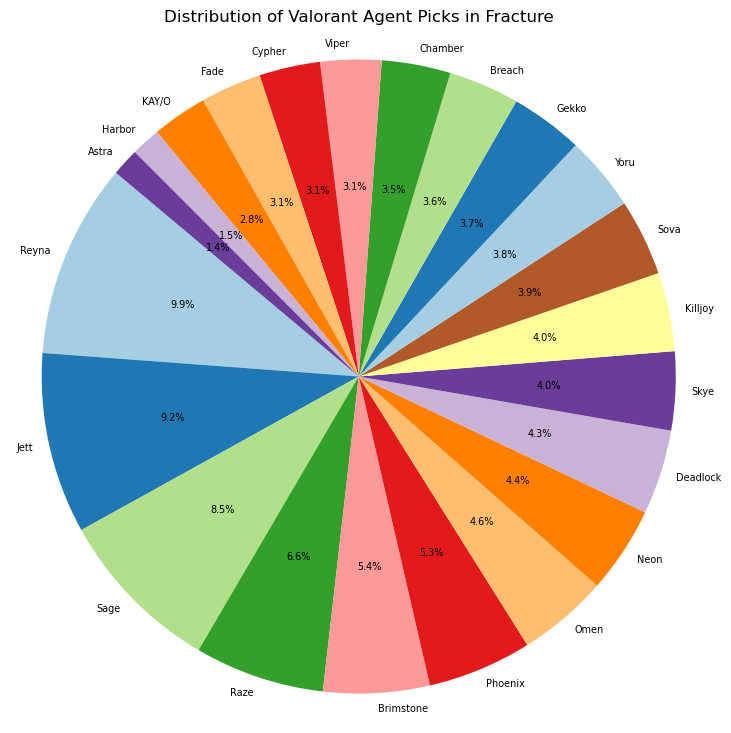

In [46]:
plt.figure(figsize=(9,9))
plt.pie(data_pickpcnt_sorted['pick_pcnt'], 
        labels=data_pickpcnt_sorted['agent'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 7}, 
        labeldistance=1.05
       )
plt.title('Valorant Agent Pick Percentages')
plt.axis('equal')
plt.title("Distribution of Valorant Agent Picks in Fracture")
plt.show()

#### FINDINGS:
**Analysis of Agent Pick Percentage on the Fracture Map**

In this section, we delve into the "pick_pcnt" column, which represents the pick percentage of agents on the Fracture map. The data is presented in descending order of pick percentage, shedding light on the preferences of players in selecting certain agents and their implications.

**Agents with Highest Pick Percentages**

- **Reyna - 9.9% Pick Percentage**: Reyna emerges as the most popular pick with a significant 9.9% pick rate. Her aggressive playstyle and ability to secure frags make her a favored choice. Abilities like "Dismissing" from combat and her ultimate "Empress" contribute to her effectiveness in clutch situations.

- **Jett - 9.2% Pick Percentage**: Jett follows closely with a 9.2% pick rate. Jett's mobility and versatility, enabled by abilities like "Updraft" and "Blade Storm," allow players to capitalize on map dynamics and execute impactful plays.

- **Sage - 8.5% Pick Percentage**: Sage's 8.5% pick rate highlights her supportive role on the battlefield. Her healing abilities and crowd control with "Slow Orb" make her a strategic choice for maintaining team survivability and controlling key areas.

**Common Themes Among Top Agent Picks**

Several common themes emerge among agents with high pick percentages:

- **Agility and Fragging Potential**: Agents like Reyna and Jett are known for their fragging potential, which appeals to players looking to secure kills and create advantageous situations for their team.

- **Versatility and Map Dynamics**: Jett's mobility and Sage's healing contribute to their popularity. These abilities allow players to adapt to shifting scenarios and play a significant role in various situations, enhancing team performance.

- **Team Support and Sustainability**: Sage's high pick rate is attributed to her ability to sustain teammates through healing. In a tactical game like Valorant, agents that offer support can greatly influence the outcome of rounds.

**Agents Popular Across Multiple Maps**

It's important to note that Reyna, Jett, and Sage are often popular picks across various maps due to their versatile abilities and strong individual impact. Their high pick percentages may not necessarily reflect their suitability specifically for the Fracture map.

The analysis of the "pick_pcnt" column underscores the player preferences for agents that offer fragging potential, map versatility, and team support. The selected agents' abilities align with different playstyles, ranging from aggressive fragging to strategic map control. These insights reflect the diversity of playstyles and strategies embraced by players on the dynamic Fracture map.


### Number of Matches of the Valorant Agents in Fracture

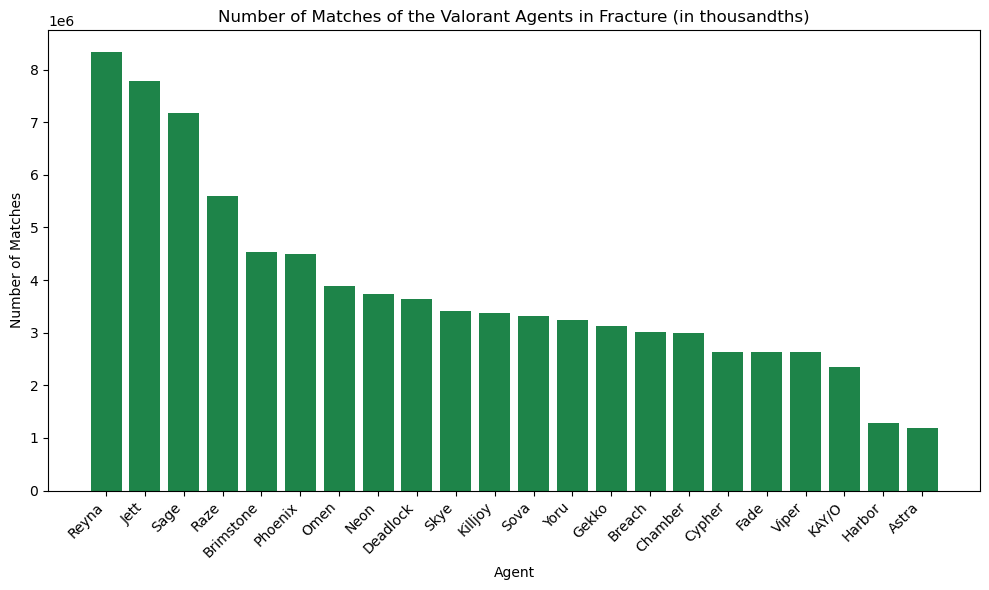

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(data_matches_sorted['agent'], data_matches_sorted['matches'], color='#1e8449')
plt.xlabel('Agent')
plt.ylabel('Number of Matches')
plt.title('Number of Matches of the Valorant Agents in Fracture (in thousandths)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Matches Played on the Fracture Map**

In this section, we explore the "matches" column, focusing on the agent matches played on the Fracture map. The data is presented in descending order of matches played, providing insights into agent popularity and the potential impact of agent choices on the map's dynamic gameplay.

**Agents with Highest Matches Played**

- **Reyna - 8330001 Matches Played**: Reyna emerges as the most frequently chosen agent on the Fracture map with a staggering 8,330,001 matches played. Her popularity could be attributed to her aggressive playstyle, fragging potential, and unique abilities like "Dismiss" that allow her to reposition swiftly.

- **Jett - 7788133 Matches Played**: Jett closely follows Reyna with 7,788,133 matches played. Jett's mobility, high skill ceiling, and abilities like "Updraft" and "Tailwind" make her a popular choice for players seeking dynamic and agile gameplay.

- **Sage - 7173064 Matches Played**: Sage's popularity is also notable with 7,173,064 matches played. Her healing capabilities, crowd control, and ability to shape engagements with "Slow Orb" contribute to her consistent presence on the map.

**Agent Popularity Across Multiple Maps**

It's important to note that Reyna, Jett, and Sage are often popular picks across various maps in Valorant. Their versatile kits and abilities make them appealing choices for players regardless of the map's specific characteristics. While these agents may have high matches played on the Fracture map, this statistic alone doesn't necessarily indicate their effectiveness or suitability for the map's unique challenges.

**Common Themes Among Top Agent Matches Played**

Several common themes emerge among agents with high matches played:

- **Aggressive Playstyle**: Agents like Reyna and Jett, known for their aggressive playstyles and fragging capabilities, are often favored by players who seek high individual impact.

- **Mobility and Versatility**: Jett's agility and Sage's healing abilities contribute to their popularity. Their versatile skill sets allow players to adapt to the map's dynamics and changing situations.

- **Support and Control**: Sage's frequent matches played underscore her role as a support agent, highlighting the importance of her healing and crowd control abilities in shaping engagements.



**Agent Popularity and Map Dynamics**

The high matches played by Reyna, Jett, and Sage may reflect their overall popularity across multiple maps, as their abilities translate well to various environments. The sheer number of matches played doesn't necessarily denote their effectiveness on the Fracture map alone.


The analysis of agent matches played provides insights into the agent preferences of players on the Fracture map. The popularity of Reyna, Jett, and Sage highlights their appeal due to factors such as aggressive playstyles, mobility, versatility, and support capabilities. These insights underline the diverse playstyles and strategies embraced by players seeking success on the ever-evolving Fracture map.


### Valorant Agent Average Scores in Fracture

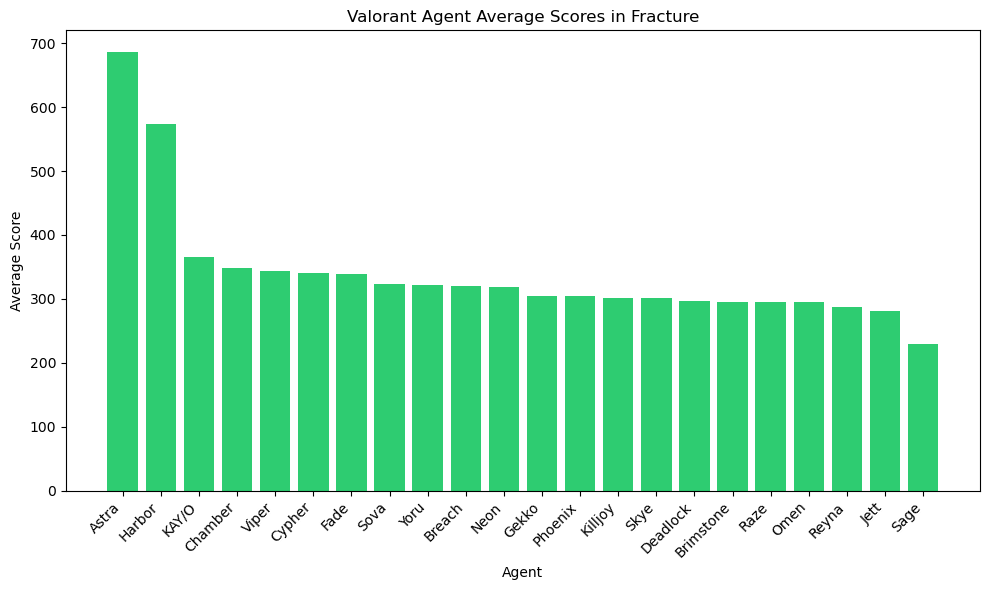

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(data_avgscore_sorted['agent'], data_avgscore_sorted['avg_score'], color='#2ecc71')
plt.xlabel('Agent')
plt.ylabel('Average Score')
plt.title('Valorant Agent Average Scores in Fracture')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### FINDINGS:
**Analysis of Agent Average Scores on the Fracture Map**

In this analysis, we delve into the "avg_score" column, exploring the agent average scores on the Fracture map. The data is presented in descending order of average scores, shedding light on the performance of agents in different match scenarios and their ability to contribute to their teams' success.

**Agents with Highest Average Scores**

- **Astra**: Astra takes the lead with an impressive average score with a whopping 686. Astra's abilities, focused on spatial control and disruption, allow her to manipulate the battlefield with her "Nebula" and "Gravity Well," potentially leading to impactful moments that boost her average score.

- **Harbor**: Harbor follows with an average score of 574. The inherent synergy of Harbor's abilities, emphasizing area control and denial, can contribute to her ability to secure high-scoring plays.

**Common Themes Among Top Average Scores**

Several common themes can be observed among agents with high average scores:

- **Control and Disruption**: Agents like Astra and Harbor, known for their ability to control and disrupt the battlefield, often excel in gaining an advantage through area denial and impactful abilities.

- **Dominance in Dynamic Terrain**: What sets Astra and Harbor apart from other agents in terms of average scores is their profound synergy with Fracture's unique terrain and structure.While other agents certainly excel in their own right, Astra and Harbor's standout average scores on the Fracture map can be attributed to their innate ability to exploit the intricacies of the environment. Their kits align remarkably well with the map's challenges, making them prime choices for players aiming to dominate the competition on Fracture.

The analysis of agent average scores offers insights into the agents' ability to contribute to their teams' success on the Fracture map. Astra's spatial control and Harbor's area denial enable them to secure high-scoring moments. These insights underline the diversity of strategies and approaches embraced by players seeking dominance on the dynamic Fracture map.



## Conclusion

In conclusion, our meticulous analysis of Valorant agent statistics on the Fracture map has uncovered a wealth of insights that illuminate the intricate interplay between agent abilities and the strategic intricacies of this unique battlefield.

### Common Themes Among Agents

As we've meticulously examined the key metrics, a tapestry of recurring themes has emerged, underscoring the dynamic synergy between agents' unique capabilities and the nuanced demands of the Fracture map:

- **Aggressive Duelists**: Notably, Reyna, Jett, and Raze have garnered attention with their impressive K/D ratios, signifying their proficiency in securing eliminations and sustaining pressure. These agents are poised to excel in fast-paced confrontations, making them appealing choices for those who relish intense engagements.

- **Adaptable Zoners**: The enigmatic Astra takes the spotlight, boasting an impressive combination of high average score, win percentage, and K/D ratio. Her prowess in manipulating the battlefield, controlling zones, and bolstering team coordination positions her as a formidable contender for mastering the complexities of Fracture's multi-dimensional landscape.

- **Versatile Control**: Killjoy and Sage emerge as compelling options, exemplifying their capacity to establish and assert control over crucial zones on the map. Their contributions align with a balanced strategy, encompassing disruption of opponents' tactics and bolstering overall team success.

### Optimal Agent Selection for Fracture

Guided by the comprehensive analysis of diverse metrics, the following agents emerge as prime candidates for players aiming to optimize their performance on the intricate Fracture map:

- **Astra**: Embodied by her exceptional average score, win percentage, and K/D ratio, Astra epitomizes adaptability and strategic prowess. Her capability to navigate the multifaceted challenges of the map, manipulate terrain, and pivot the tide of battle underscores her significance in the evolving Fracture meta.

- **Reyna and Jett**: Armed with potent K/D ratios and win percentages, these agents harness aggressive playstyles and heightened mobility to secure pivotal eliminations and sustain map dominance. Their unique attributes empower players to control engagements and assert their presence.

- **Killjoy and Sage**: These agents' aptitude for orchestrating zone control and bolstering team synergy positions them as versatile selections for a well-rounded strategy. The equilibrium between disruption and support underscores their potential contributions to achieving tactical success.

It's highly considered to acknowledge that the synergy between individual playstyles and team dynamics profoundly influences agent effectiveness. Consequently, while these recommendations offer strategic insight, the versatility of Valorant's gameplay mandates a customized approach that aligns with preferred strategies and the ever-evolving meta.

In closing, the journey through the intricate landscape of Valorant agent statistics on the enigmatic Fracture map has not only provided us with valuable insights but has also highlighted the fusion of strategy, skill, and adaptability that define the essence of competitive gaming. As players step onto the battlefield, armed with the knowledge of agent attributes, map intricacies, and strategic nuances, they embark on a dynamic quest for mastery. The analysis presented here serves as a guide, a compass guiding players towards better decision-making and refined tactics. Yet, it's important to remember that the heart of Valorant beats with the rhythm of constant change and evolution, urging players to continue exploring, refining, and embracing the challenge of staying ahead in the ever-evolving world of competitive gaming.